In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [8]:
with open('TrainData/train.pkl', 'rb') as f:
    train = pickle.load(f)

train.head()

,CustomerID,ReportedFraud,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,IncidentTime,...,InsuredZipCode,InsuredGender,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,CapitalGains,CapitalLoss,PolicyCombinedLimit,PolicySingleLimit,TimeDelta
0,20065,0,0,1,2,3,6,3,360,19,...,577,1,3,11,18,-0.834616,-0.636247,-0.151765,-0.290132,0.469348
1,37589,0,2,2,1,0,1,2,604,14,...,29,0,2,13,14,1.021569,0.893521,-1.081375,-0.983964,0.218107
2,24312,0,0,2,0,0,2,1,490,21,...,692,0,6,6,8,-0.834616,0.893521,1.397586,1.444450,0.226454
3,5493,1,0,2,0,0,4,3,369,12,...,809,0,1,3,8,0.880455,-1.116315,-1.081375,-0.983964,1.509788
4,7704,1,0,2,0,3,1,5,325,3,...,160,1,5,11,5,-0.834616,0.893521,-0.151765,-0.290132,0.053673


In [23]:
with open('TestData/test.pkl', 'rb') as f:
    test = pickle.load(f)

test.head()

,CustomerID,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,IncidentTime,NumberOfVehicles,...,InsuredZipCode,InsuredGender,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,CapitalGains,CapitalLoss,PolicyCombinedLimit,PolicySingleLimit,TimeDelta
0,10008,0,0,1,0,2,1,312,4,2,...,576,0,2,0,0,1.206101,-1.148558,1.397586,1.444450,0.547906
1,10010,2,1,1,1,6,4,339,16,0,...,341,0,4,9,9,1.216956,-1.456661,-1.081375,-0.983964,-1.510277
2,10015,0,1,1,4,2,1,935,20,2,...,422,1,3,7,12,0.265345,0.893521,-0.151765,-0.290132,-1.313805
3,10020,3,1,3,2,4,4,402,10,0,...,712,0,5,3,18,1.643915,0.893521,1.397586,-0.290132,0.179469
4,1003,0,1,1,4,2,1,830,7,2,...,6,0,6,11,2,0.435405,0.893521,-1.081375,-0.983964,0.201899


In [9]:
from sklearn.model_selection import train_test_split


X = train.drop(['ReportedFraud', 'CustomerID'], axis=1)
y = train['ReportedFraud']
X_tr, X_test_dev, y_tr, y_test_dev = train_test_split(X, y, test_size=0.1)

In [25]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_jobs=-1)
models = {'model': rf, 
          'params':{
            'n_estimators': [5, 10, 50, 100, 500],
            'criterion': ['gini', 'log_loss', 'entropy'],
          }}

In [6]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(models['model'], models['params'], scoring='recall', cv=5)
grid_search.fit(X_tr, y_tr)
res  = pd.DataFrame(grid_search.cv_results_)
res

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.751639,1.001991,0.015135,0.006378,gini,5,"{'criterion': 'gini', 'n_estimators': 5}",0.755175,0.765168,0.762857,0.786581,0.798715,0.773699,0.016280,10
1,0.318652,0.006142,0.010418,0.004712,gini,10,"{'criterion': 'gini', 'n_estimators': 10}",0.763026,0.761599,0.753571,0.748751,0.779443,0.761278,0.010483,14
2,1.125523,0.223813,0.035226,0.012306,gini,50,"{'criterion': 'gini', 'n_estimators': 50}",0.798001,0.805139,0.794286,0.783726,0.820128,0.800256,0.012106,9
3,2.069875,0.251758,0.054238,0.013972,gini,100,"{'criterion': 'gini', 'n_estimators': 100}",0.798001,0.807994,0.806429,0.788009,0.826552,0.805397,0.012747,3
4,8.604305,0.527721,0.211053,0.031161,gini,500,"{'criterion': 'gini', 'n_estimators': 500}",0.800857,0.815132,0.807857,0.793719,0.827266,0.808966,0.011596,1
5,0.278436,0.011131,0.013774,0.002904,log_loss,5,"{'criterion': 'log_loss', 'n_estimators': 5}",0.739472,0.775161,0.739286,0.742327,0.780157,0.755280,0.018372,15
6,0.354306,0.018302,0.013360,0.001420,log_loss,10,"{'criterion': 'log_loss', 'n_estimators': 10}",0.751606,0.762313,0.762143,0.755889,0.793005,0.764991,0.014575,13
7,1.126553,0.057120,0.025357,0.001082,log_loss,50,"{'criterion': 'log_loss', 'n_estimators': 50}",0.795146,0.804425,0.801429,0.788722,0.819415,0.801827,0.010321,7
8,2.235293,0.034276,0.043563,0.002212,log_loss,100,"{'criterion': 'log_loss', 'n_estimators': 100}",0.798715,0.809422,0.800000,0.793719,0.825125,0.805396,0.011095,4
9,9.659634,0.477049,0.184812,0.008222,log_loss,500,"{'criterion': 'log_loss', 'n_estimators': 500}",0.802284,0.810136,0.803571,0.796574,0.825125,0.807538,0.009794,2


In [7]:
print(grid_search.best_params_, '\n', grid_search.best_score_)

{'criterion': 'gini', 'n_estimators': 500} 
 0.8089661466299581


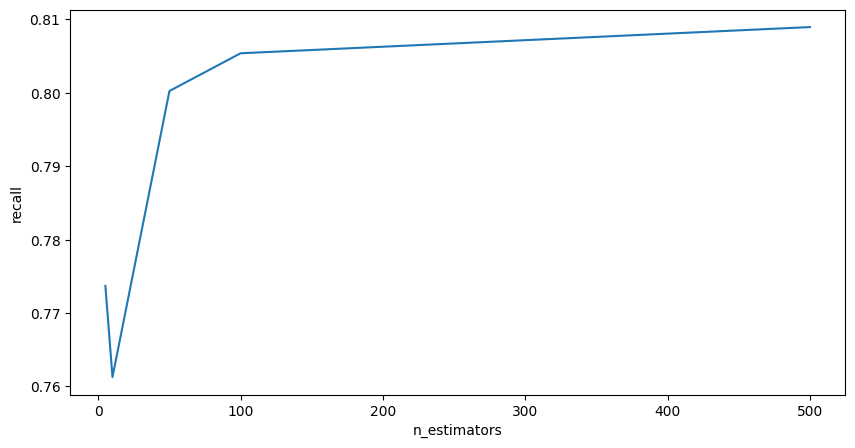

In [12]:
# import evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
res_gini = res[res['param_criterion'] == 'gini']
# plot result of grid search in relatioship to n_estimators
plt.figure(figsize=(10, 5))
plt.plot(res_gini['param_n_estimators'], res_gini['mean_test_score'])
plt.xlabel('n_estimators')
plt.ylabel('recall')
plt.show()

{'n_estimators': 500} 
 0.8091089018048333


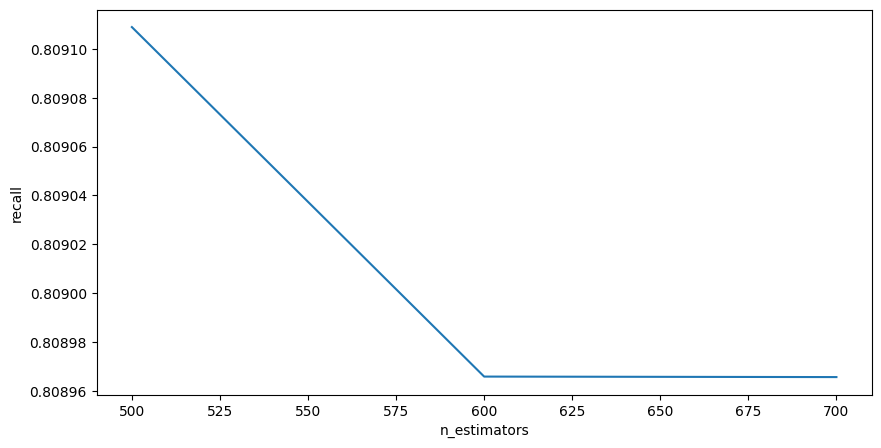

In [13]:
params = {'n_estimators': [500, 600, 700]}
rf = RandomForestClassifier(n_jobs=-1, criterion='gini')
grid_search = GridSearchCV(rf, params, scoring='recall', cv=5)
grid_search.fit(X_tr, y_tr)
res_finer  = pd.DataFrame(grid_search.cv_results_)

print(grid_search.best_params_, '\n', grid_search.best_score_)
plt.figure(figsize=(10, 5))
plt.plot(res_finer['param_n_estimators'], res_finer['mean_test_score'])
plt.xlabel('n_estimators')
plt.ylabel('recall')
plt.show()

{'n_estimators': 450} 
 0.8095372692974407


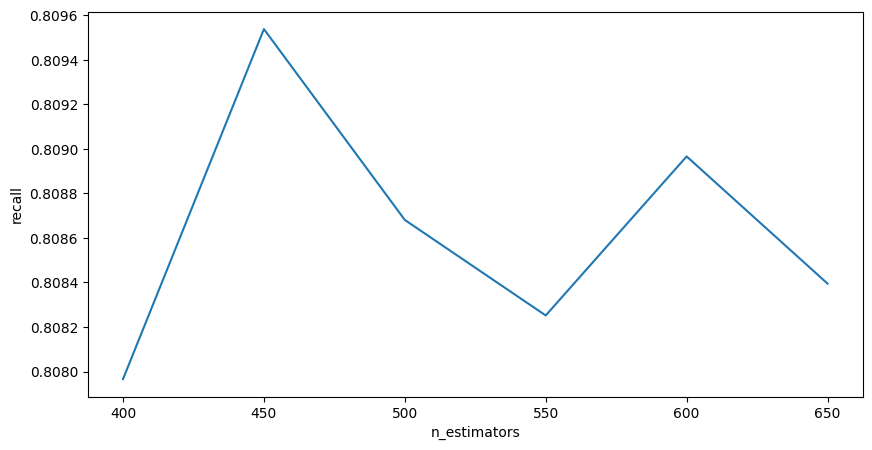

In [14]:
params = {'n_estimators': [400, 450, 500, 550, 600, 650]}
rf = RandomForestClassifier(n_jobs=-1, criterion='gini')
grid_search = GridSearchCV(rf, params, scoring='recall', cv=5)
grid_search.fit(X_tr, y_tr)
res_finer  = pd.DataFrame(grid_search.cv_results_)
print(grid_search.best_params_, '\n', grid_search.best_score_)
plt.figure(figsize=(10, 5))
plt.plot(res_finer['param_n_estimators'], res_finer['mean_test_score'])
plt.xlabel('n_estimators')
plt.ylabel('recall')
plt.show()


{'n_estimators': 460, 'min_samples_split': 50, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 50} 
 0.814106658509228


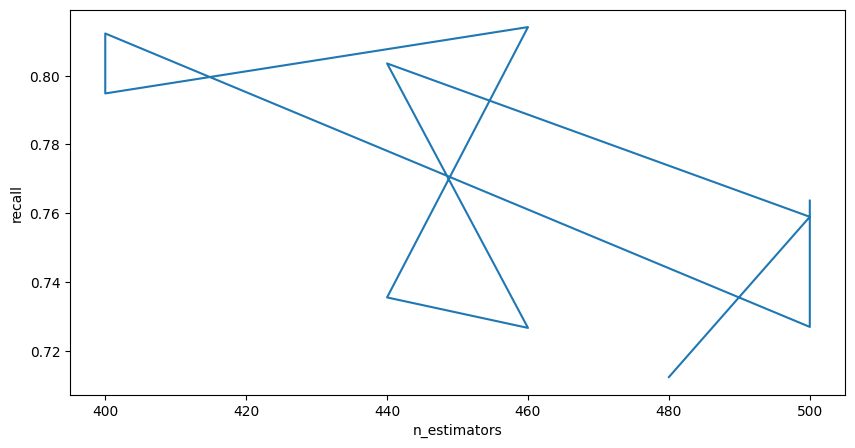

In [18]:
from sklearn.model_selection import RandomizedSearchCV
params = {'n_estimators': [400, 440, 460, 480, 500],
          'max_depth': [None, 5, 10, 20, 50],
          'min_samples_split': [5, 10, 20, 50],
          'min_samples_leaf': [1, 2, 5, 10, 20, 50],
          'max_features': ['sqrt', 'log2', None],
          }
rf = RandomForestClassifier(n_jobs=-1, criterion='gini')
rand_search = RandomizedSearchCV(rf, params, scoring='recall', cv=5)
rand_search.fit(X_tr, y_tr)
res_rand= pd.DataFrame(rand_search.cv_results_)
print(rand_search.best_params_, '\n', rand_search.best_score_)
plt.figure(figsize=(10, 5))
plt.plot(res_rand['param_n_estimators'], res_rand['mean_test_score'])
plt.xlabel('n_estimators')
plt.ylabel('recall')
plt.show()

In [19]:
params = {'n_estimators': [440, 450, 460, 470, 480, 490, 500],
          'max_depth': [40, 45, 50, 55, 60],
          'min_samples_split': [40, 45, 50, 55, 60],
          'min_samples_leaf': [2],
          'max_features': [None],
          }
rf = RandomForestClassifier(n_jobs=-1, criterion='gini')
rand_search = RandomizedSearchCV(rf, params, scoring='recall', cv=5)
rand_search.fit(X_tr, y_tr)
res_rand= pd.DataFrame(rand_search.cv_results_)
print(rand_search.best_params_, '\n', rand_search.best_score_)

{'n_estimators': 490, 'min_samples_split': 40, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 55} 
 0.8151058427653716


In [20]:
params = {'max_depth': [50, 52, 54, 56, 58, 60],
          'min_samples_split': [20, 25, 30, 35, 40]}

rf = RandomForestClassifier(n_jobs=-1, criterion='gini', 
                            n_estimators=500, max_features=None, 
                            min_samples_leaf=2)
grid_fine = GridSearchCV(rf, params, scoring='recall', cv=5)
grid_fine.fit(X_tr, y_tr)
res_grid_fine = pd.DataFrame(grid_fine.cv_results_)
print(grid_fine.best_params_, '\n', grid_fine.best_score_)

{'max_depth': 54, 'min_samples_split': 25} 
 0.815391455083104


In [26]:
from sklearn.model_selection import cross_val_score

rf_tweaked = RandomForestClassifier(n_jobs=-1, criterion='gini',
                                    n_estimators=500, max_features=None,
                                    min_samples_leaf=2, max_depth=50,
                                    min_samples_split=20)

print(cross_val_score(rf_tweaked, X_tr, y_tr, scoring='recall', cv=5).mean())

rf_tweaked.fit(X_tr, y_tr)
y_pred = rf_tweaked.predict(X_test_dev)
print('accuracy: ', accuracy_score(y_test_dev, y_pred))
print('precision: ', precision_score(y_test_dev, y_pred))
print('recall: ', recall_score(y_test_dev, y_pred))
print('f1: ', f1_score(y_test_dev, y_pred))
print('roc_auc: ', roc_auc_score(y_test_dev, y_pred))

0.8167094721199198
accuracy:  0.9361997226074896
precision:  0.9310872894333844
recall:  0.8139223560910308
f1:  0.8685714285714285
roc_auc:  0.8964323993838401


Our model fits data very well

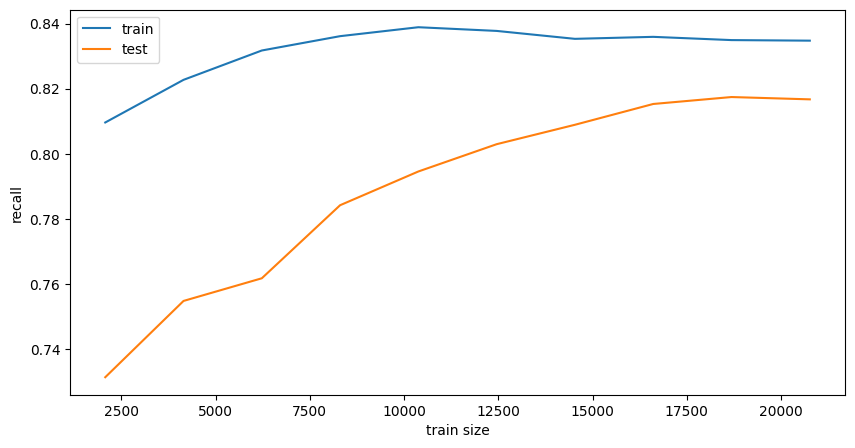

In [27]:
# import learning curve
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(rf_tweaked, X_tr, y_tr,
                                                        scoring='recall',
                                                        cv=5, n_jobs=-1,
                                                        train_sizes=np.linspace(0.1, 1, 10))

# plot learning curve
plt.figure(figsize=(10, 5))
plt.plot(train_sizes, train_scores.mean(axis=1), label='train')
plt.plot(train_sizes, test_scores.mean(axis=1), label='test')
plt.xlabel('train size')
plt.ylabel('recall')
plt.legend()
plt.show()

In [28]:
y_dev_pred = rf_tweaked.predict(X_test_dev)
print('recall ', recall_score(y_test_dev, y_dev_pred))

recall  0.8139223560910308


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_tr, y_tr, test_size=0.2)
rf_tweaked.fit(X_train, y_train)

y_train_pred = rf_tweaked.predict(X_train)
y_test_pred = rf_tweaked.predict(X_test)
y_dev_pred = rf_tweaked.predict(X_test_dev)

scores = pd.DataFrame({'train': [accuracy_score(y_train, y_train_pred),
                                    precision_score(y_train, y_train_pred),
                                    recall_score(y_train, y_train_pred),
                                    f1_score(y_train, y_train_pred),
                                    roc_auc_score(y_train, y_train_pred)],
                            'test': [accuracy_score(y_test, y_test_pred),
                                    precision_score(y_test, y_test_pred),
                                    recall_score(y_test, y_test_pred),
                                    f1_score(y_test, y_test_pred),
                                    roc_auc_score(y_test, y_test_pred)],
                            'dev': [accuracy_score(y_test_dev, y_dev_pred),
                                    precision_score(y_test_dev, y_dev_pred),
                                    recall_score(y_test_dev, y_dev_pred),
                                    f1_score(y_test_dev, y_dev_pred),
                                    roc_auc_score(y_test_dev, y_dev_pred)]},
                            index=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])
scores

,train,test,dev
accuracy,0.940128,0.936428,0.938974
precision,0.941579,0.932300,0.958204
recall,0.830638,0.822302,0.805990
f1,0.882636,0.873853,0.875530
roc_auc,0.905738,0.900233,0.896615


Model seems to be overfitting a little bit. We can try to reduce the number of trees.

In [41]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True)
rf_regularized = RandomForestClassifier(n_jobs=-1, criterion='gini',
                                        n_estimators=400, max_features=None,
                                        min_samples_leaf=2, max_depth=30,
                                        min_samples_split=30)

recall = []
accuracy = []
precision = []
f1 = []
roc_auc = []

recall_train = []
accuracy_train = []
precision_train = []
f1_train = []
roc_auc_train = []

rf_regularized.fit(X_tr, y_tr)
y_dev_pred = rf_regularized.predict(X_test_dev)
scores_reg = pd.DataFrame({'train': [0, 0, 0, 0, 0],
                            'test': [0, 0, 0, 0, 0],
                            'dev': [accuracy_score(y_test_dev, y_dev_pred),
                                    precision_score(y_test_dev, y_dev_pred),
                                    recall_score(y_test_dev, y_dev_pred),
                                    f1_score(y_test_dev, y_dev_pred),
                                    roc_auc_score(y_test_dev, y_dev_pred)]},
                            index=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

for train_index, test_index in kf.split(X_tr):
    X_train, X_test = X_tr.iloc[train_index], X_tr.iloc[test_index]
    y_train, y_test = y_tr.iloc[train_index], y_tr.iloc[test_index]
    rf_regularized.fit(X_train, y_train)
    y_pred = rf_regularized.predict(X_test)
    y_train_pred = rf_regularized.predict(X_train)

    recall.append(recall_score(y_test, y_pred))
    accuracy.append(accuracy_score(y_test, y_pred))
    precision.append(precision_score(y_test, y_pred))
    f1.append(f1_score(y_test, y_pred))
    roc_auc.append(roc_auc_score(y_test, y_pred))

    recall_train.append(recall_score(y_train, y_train_pred))
    accuracy_train.append(accuracy_score(y_train, y_train_pred))
    precision_train.append(precision_score(y_train, y_train_pred))
    f1_train.append(f1_score(y_train, y_train_pred))
    roc_auc_train.append(roc_auc_score(y_train, y_train_pred))  
    
scores_reg['test'] = [np.mean(accuracy), np.mean(precision), np.mean(recall), np.mean(f1), np.mean(roc_auc)]
scores_reg['train'] = [np.mean(accuracy_train), np.mean(precision_train), np.mean(recall_train), np.mean(f1_train), np.mean(roc_auc_train)]
scores_reg

,train,test,dev
accuracy,0.939629,0.932837,0.939320
precision,0.939076,0.925803,0.952672
recall,0.830622,0.817345,0.812500
f1,0.881523,0.868178,0.877020
roc_auc,0.905322,0.896487,0.898925


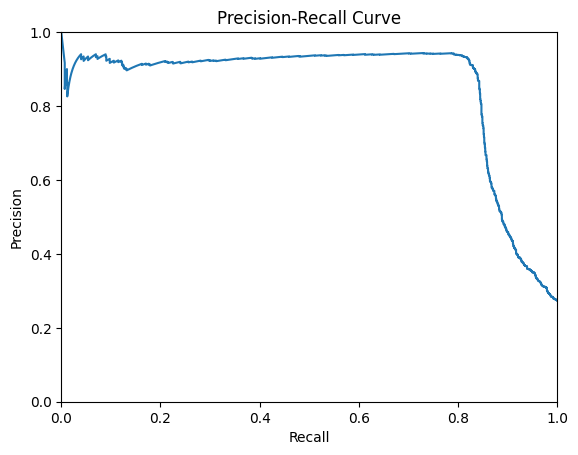

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve, roc_curve

rf_regularized = RandomForestClassifier(n_jobs=-1, criterion='gini',
                                        n_estimators=400, max_features=None,
                                        min_samples_leaf=2, max_depth=30,
                                        min_samples_split=30)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
rf_regularized.fit(X_train, y_train)

precision, recall, thresholds = precision_recall_curve(y_test, rf_regularized.predict_proba(X_test)[:, 1])
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.show()

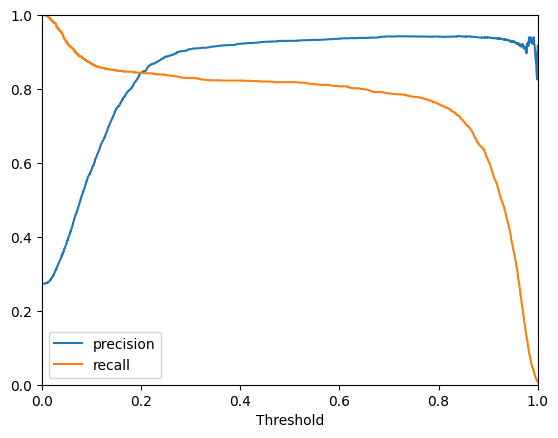

In [14]:
plt.plot(thresholds, precision[:-1], label='precision')
plt.plot(thresholds, recall[:-1], label='recall')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('Threshold')
plt.legend()
plt.show()


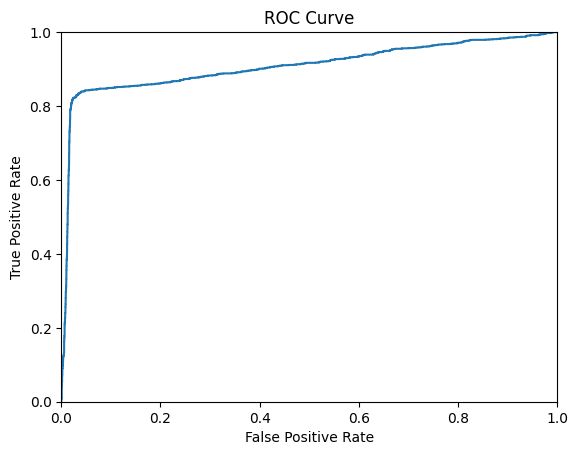

In [15]:
fpr, tpr, thresholds = roc_curve(y_test, rf_regularized.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.show()

In [17]:
with open('models/rf_regularized.pkl', 'wb') as f:
    pickle.dump(rf_regularized, f)